In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('drive/My Drive/GAN_in_art-museum')

# !pip install -r requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

from models.AE2 import Autoencoder
from utils.loaders import load_model

In [12]:
#params

SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/' .format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
x_train = x_train.astype('float32')
x_train = x_train /255.
x_train = np.expand_dims(x_train, axis=-1)

x_test = x_test.astype('float32')
x_test = x_test /255.
x_test = np.expand_dims(x_test, axis=-1)

In [16]:
#모델 불러오기

AE = load_model(Autoencoder, RUN_FOLDER)

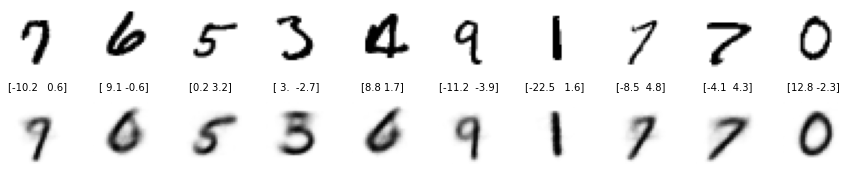

In [25]:
n_to_show = 10
np.random.seed(611)
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE.encoder.predict(example_images)

reconst_images = AE.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace = 0.4, wspace=0.4)

for i in range(n_to_show):
  img = example_images[i].squeeze()
  ax = fig.add_subplot(2, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, str(np.round(z_points[i], 1)), fontsize = 10, ha='center', transform=ax.transAxes)
  ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
  img = reconst_images[i].squeeze()
  ax = fig.add_subplot(2, n_to_show, i+n_to_show +1)
  ax.axis('off')
  ax.imshow(img, cmap='gray_r')

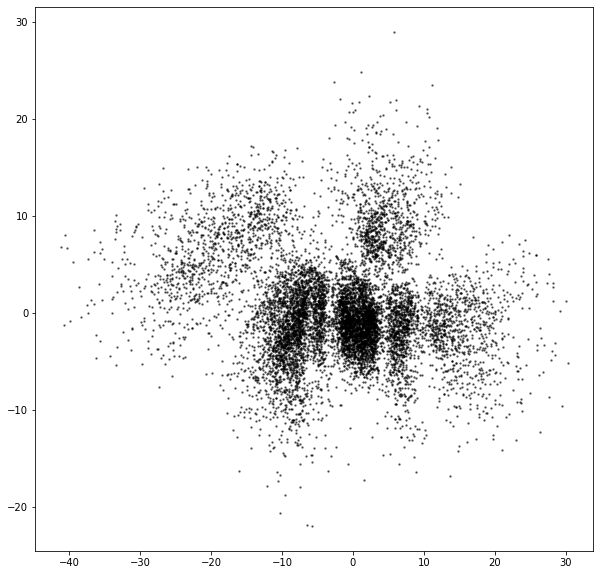

In [26]:
#encoder의 point-wall

grid_size = 15
figsize = 10

z_points = AE.encoder.predict(x_test)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0], z_points[:, 1], c='black', alpha=0.5, s=2)

plt.show()